   ## 甘特图
   
   **甘特圖（英语：Gantt chart）是条状图的一种流行类型，显示專案、進度以及其他与时间相关的系统进展的内在关系随着时间进展的情况。**

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


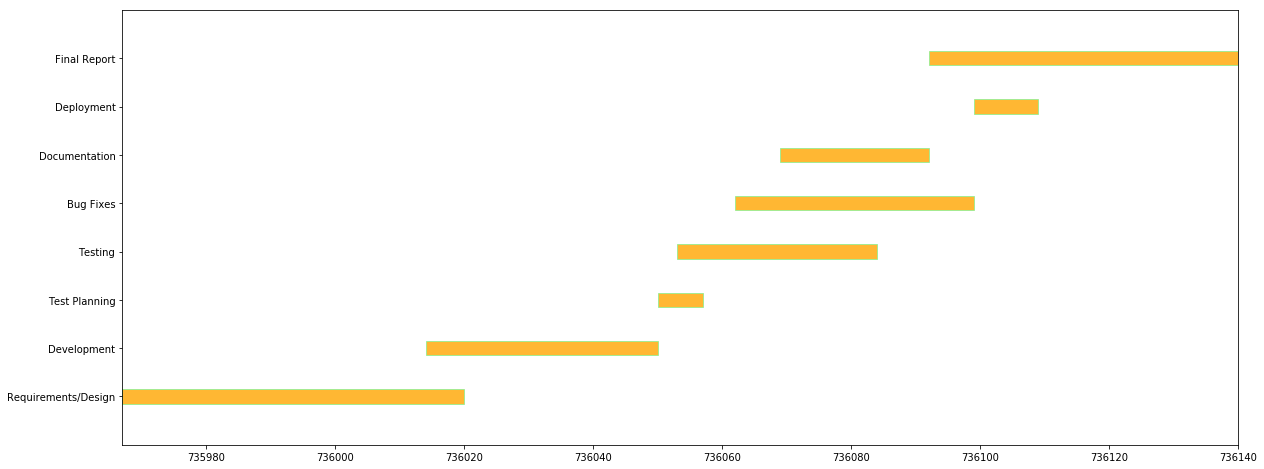

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates
import pandas as pd #一个用于辅助科学计算的数据分析工具package
import datetime as dt
%matplotlib inline
def _transfer_date(datetxt):#转换日起函数
	"""Creates the date"""
	day,month,year=datetxt.split('-')
	date = dt.datetime(int(year), int(month), int(day))
	mdate = matplotlib.dates.date2num(date) 
	return mdate

def _iterate_ele(list_):
	for i in range(len(list_)):
		list_[i] = _transfer_date(list_[i])

data_src = "../datasets/data/others/Gantt.csv"

pdata = pd.read_csv(data_src,sep=",")#读取甘特图csvdata

yValues = pdata['item'].values#获取对应数据

endDates = pdata['end_date'].values#获取对应数据
_iterate_ele(endDates)

startDates = pdata['start_date'].values#获取对应数据
_iterate_ele(startDates)

xValues = endDates - startDates

fig = plt.figure(figsize=(20,8))
fig.canvas.set_window_title('Gantt ShowCase')

ax = fig.add_subplot(111)

ax.set_xlim(xmin = min(startDates), xmax = max(endDates))#设定x轴的大小范围

ax.set_ylim(ymin = 0, ymax = len(yValues)+1)#设定y轴的大小范围

for i in range(len(yValues)):#在坐标轴上画出对应的水平条形图
	ax.barh(i+1,xValues[i],left=startDates[i],height=0.3, align='center',
		edgecolor='lightgreen', color='orange', alpha = 0.8)

#add one of the  two labels here.
x_pos = [p + 1 for p in range(len(yValues))]
plt.yticks(x_pos,yValues)#给y坐标添加label

#add the  other one label here.
#TODO: that kind of label display.Similar annotation style could be found in box_plot2.py
plt.show()